In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%precision %.4f

import warnings
warnings.filterwarnings('ignore')

# Forest Cover Type EDA

Решим задачу кластеризации, используя набор данных о типе лесного покрова в национальном лесу Рузвельта в Колорадо

https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset

Этот набор данных включает информацию о типе деревьев, покрытии тенью, расстоянии до близлежащих ориентиров (дорог и т.д.), типе почвы и местной топографии.

In [3]:
df = pd.read_csv('covtype.csv')

In [4]:
df.shape

(581012, 55)

In [5]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [6]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


- Максимальная высота над уровнем моря - 3858 м, средняя - 2959.365 м, медианная - 2996 м
- Среднее расстояние по горизонтали до ближайшей поверхности воды - 269.248м, по вертикали - 46.419 м
- Минимальное расстояние до дороги - 0 м, а максимальное - более 5 км

In [7]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


Датасет не содержит пропущенных значений

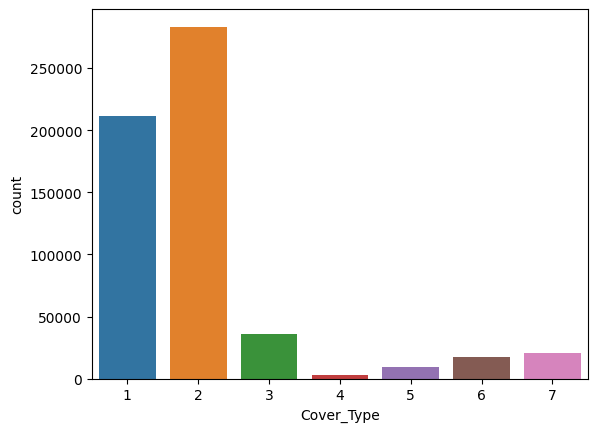

In [8]:
sns.countplot(x = 'Cover_Type', data = df);

Видно, что самые частые виды покрова - 1 и 2. Реже всего встречается 4, все остальные так же немногочисленны

In [9]:
unique_columns = {}
for col in df.columns:
    if df[col].unique().shape[0] > 2:
        unique_columns[col] = 1

In [10]:
unique_columns

{'Elevation': 1,
 'Aspect': 1,
 'Slope': 1,
 'Horizontal_Distance_To_Hydrology': 1,
 'Vertical_Distance_To_Hydrology': 1,
 'Horizontal_Distance_To_Roadways': 1,
 'Hillshade_9am': 1,
 'Hillshade_Noon': 1,
 'Hillshade_3pm': 1,
 'Horizontal_Distance_To_Fire_Points': 1,
 'Cover_Type': 1}

Признаки, которые принимают больше двух значений

Визуализируем первые десять из них

In [11]:
continuous_features = df.columns[:10]

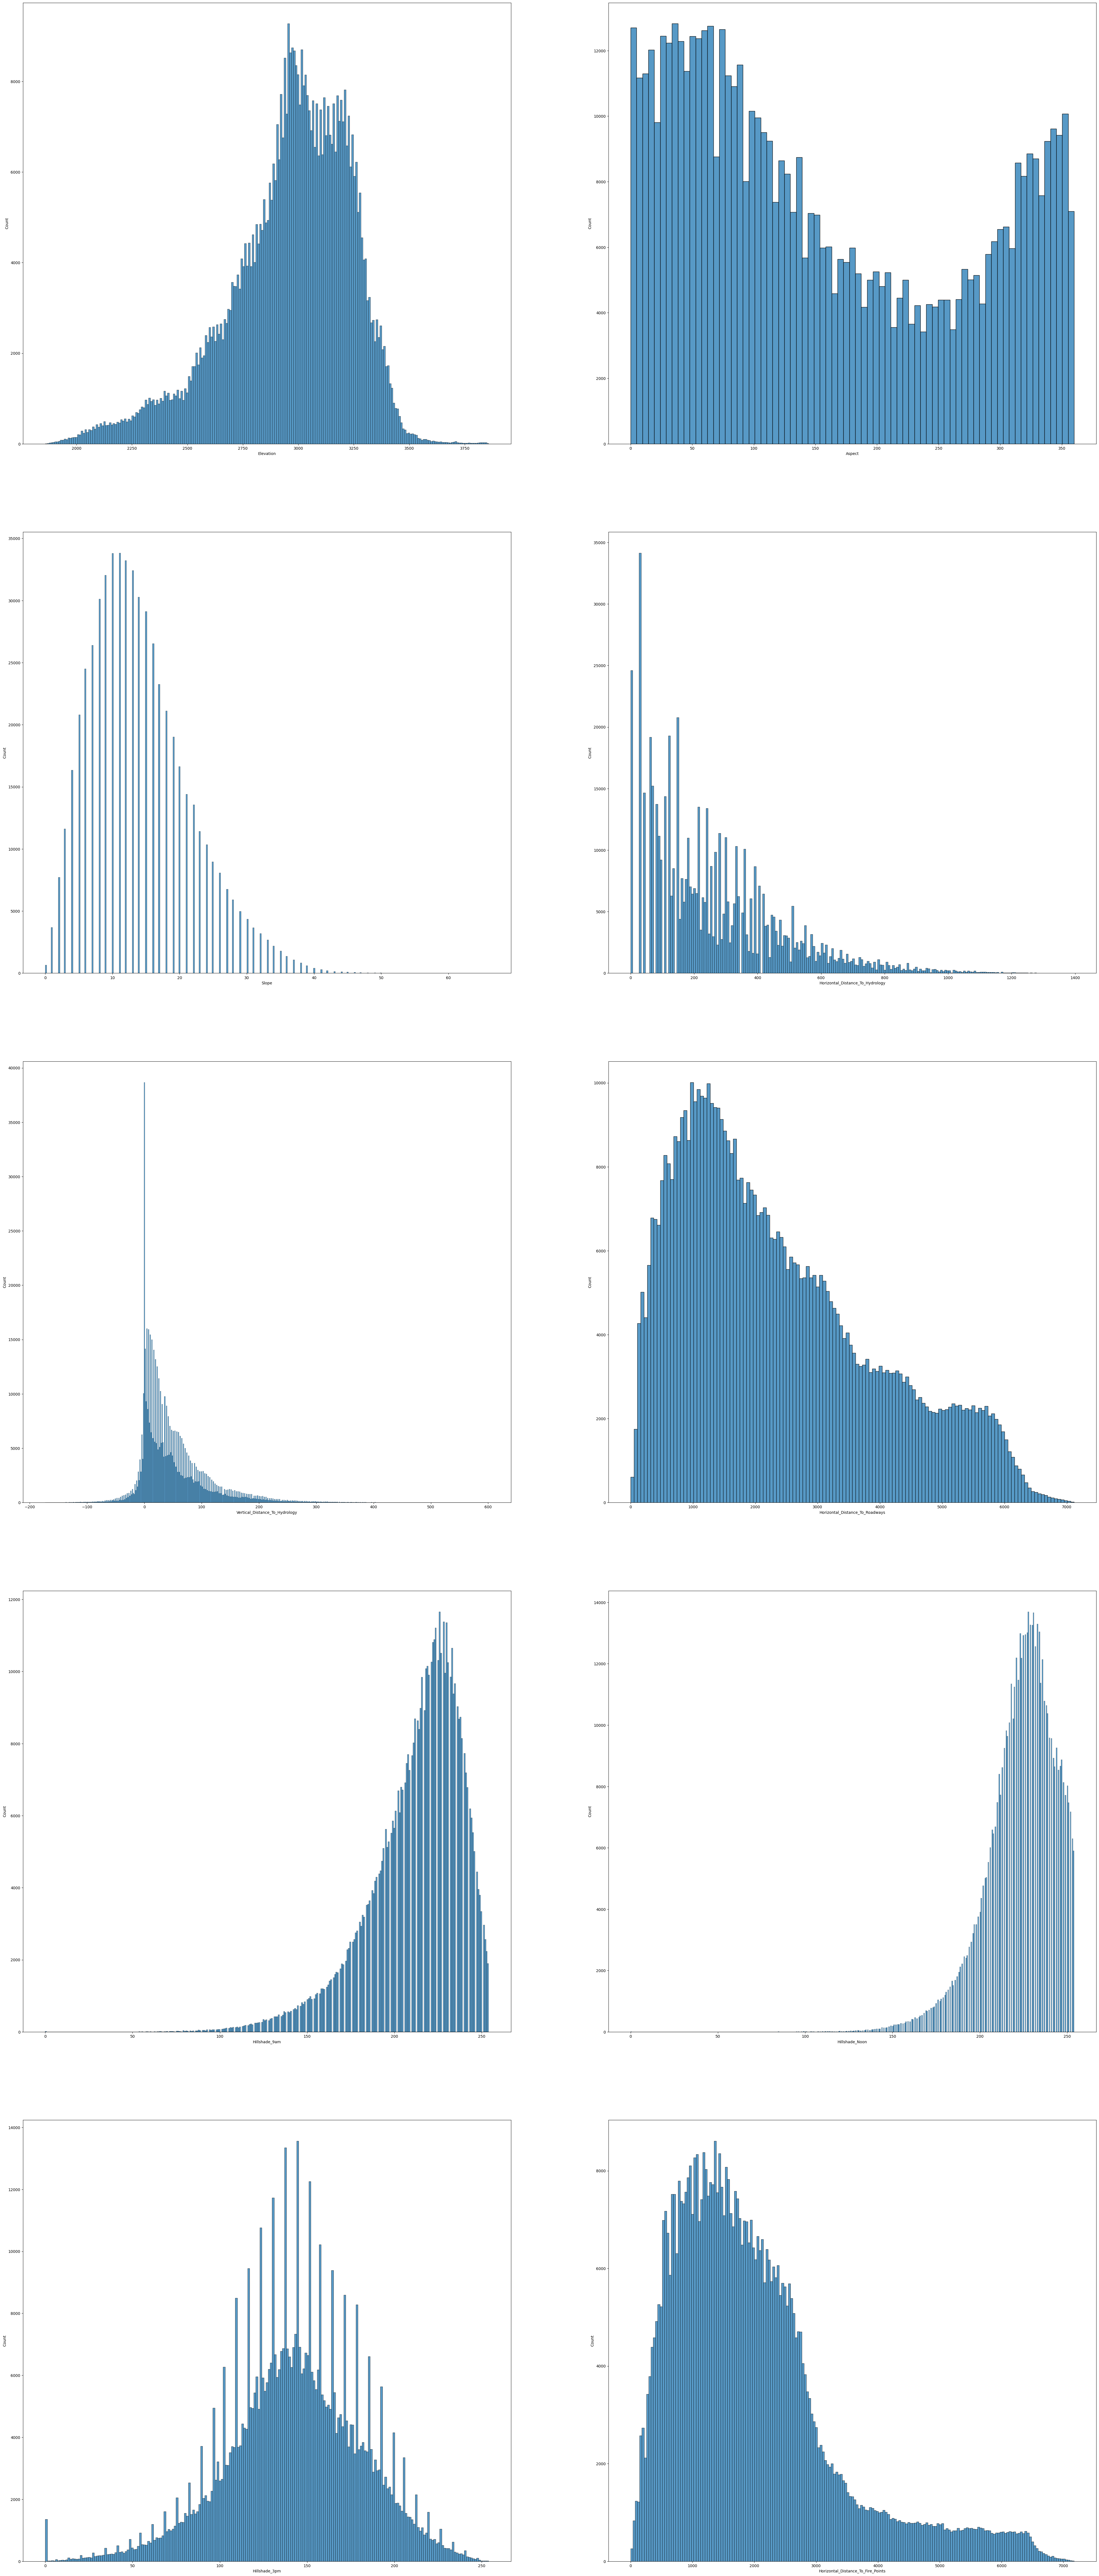

In [12]:
fig, ax = plt.subplots(5, 2, figsize = (50, 120))
for col, subplot in zip(continuous_features, ax.flatten()):
    sns.histplot(df[col], ax=subplot)

- Большинство величин имеют гамма распределение
- Hillshade_3pm - нормальное
- Aspect - сложное распределение

Также давайте построим боксплоты данных величин, чтобы исследовать их на выбросы

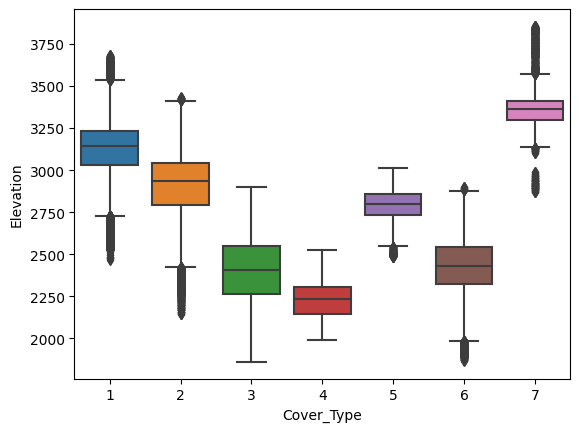

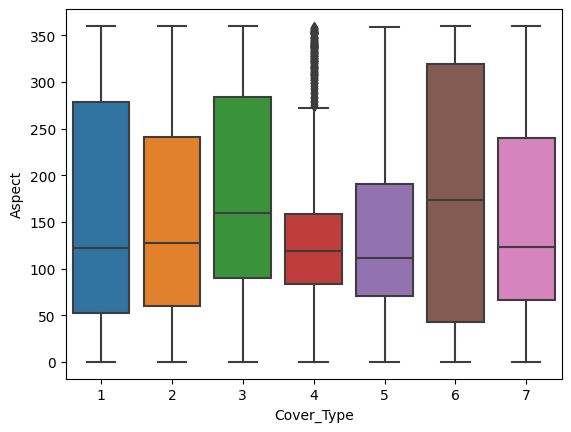

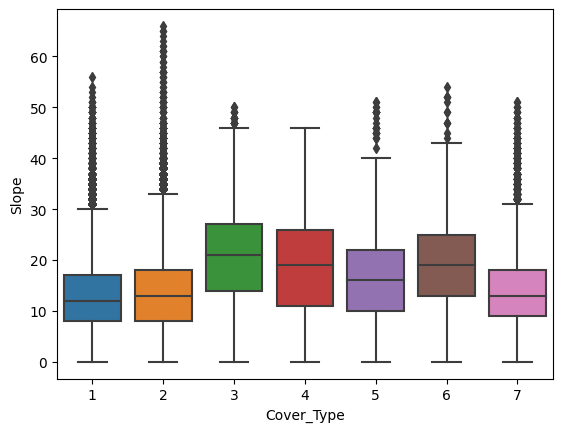

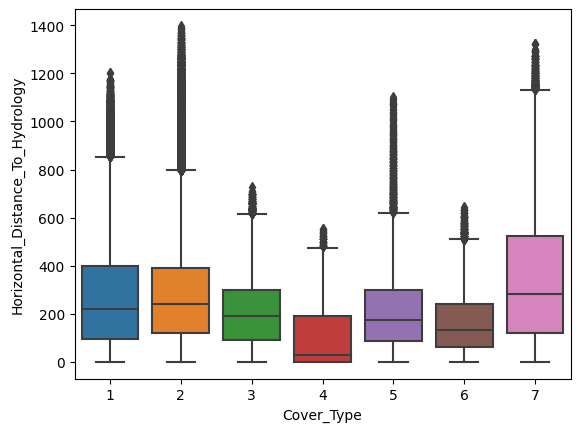

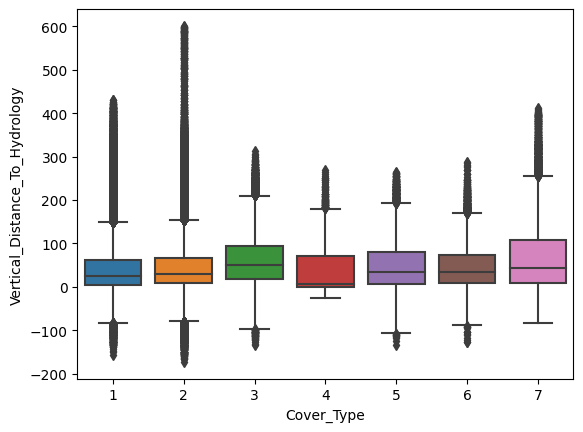

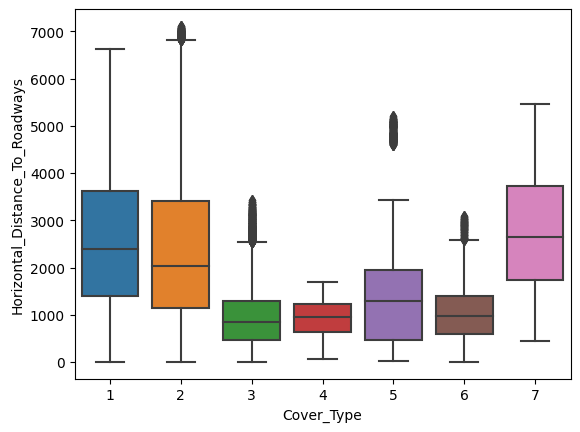

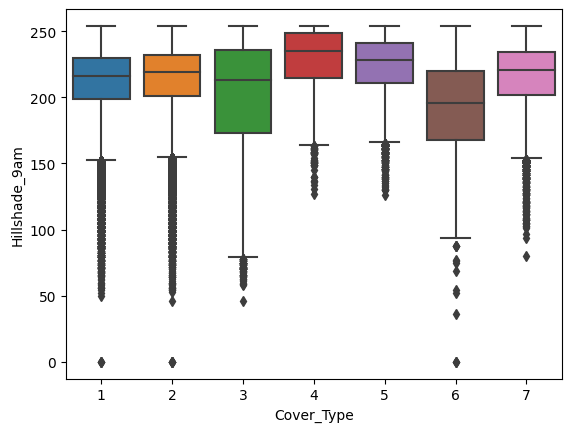

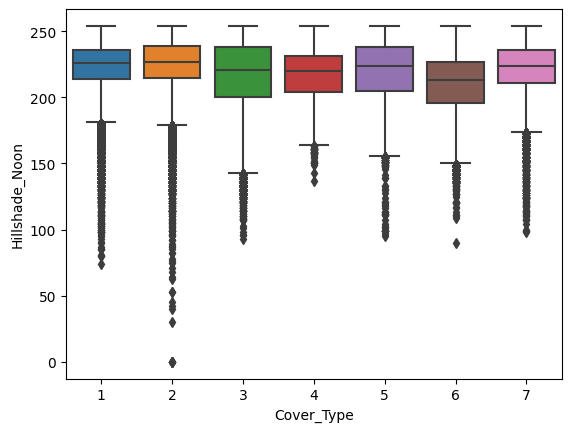

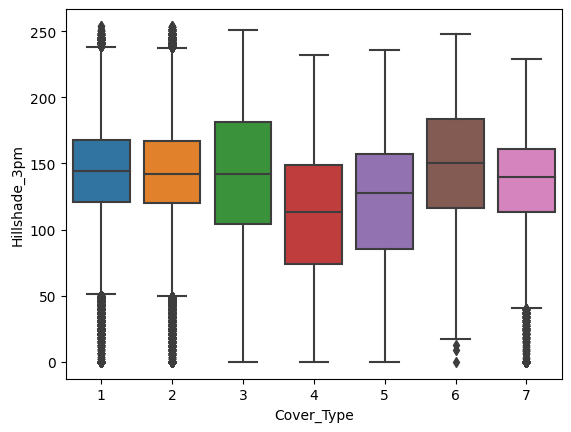

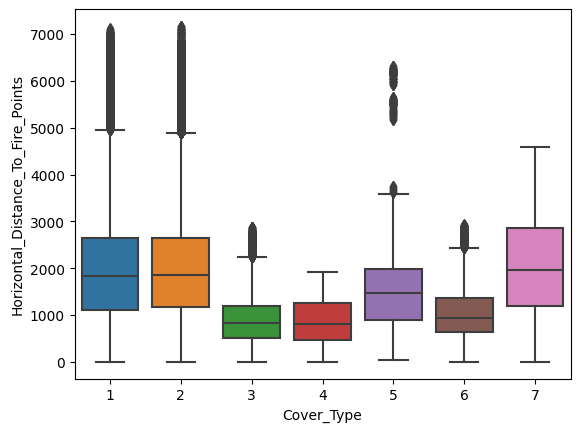

In [13]:
for col in continuous_features:
    sns.boxplot(x="Cover_Type",y=col ,data=df)
    plt.show();

- Самые высокие деревья - 1 и 7 типа
- Угол наклона одинаков примерно для всех типов
- Так же расстояние до водной поверхности у объектов всех типов отличается несильно
- Дальше всего от дорог расположены типы деревьев 1,2 и 7
- Склоны холмов достаточно похожи для всех типов деревьев
- Дальшк всего от точек воспламенения находятся объекты с номерами 1,2 и 7

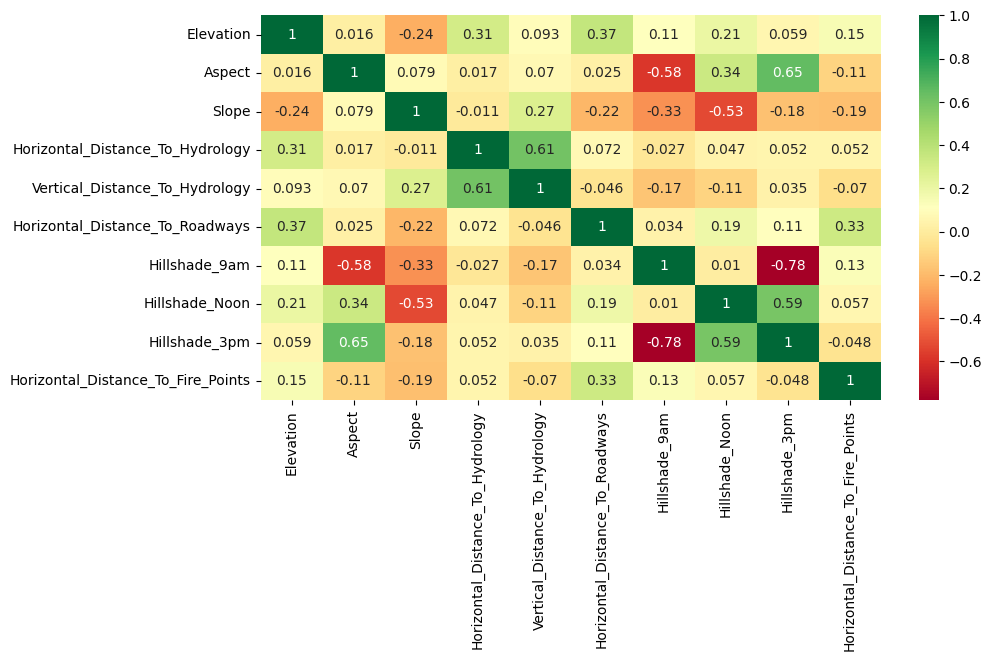

In [14]:
sns.heatmap(df[continuous_features].corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Слишком большой корреляции нет, кроме **Hillshade_3pm vs Hillshade_9am**, поэтому оставляем все признаки для анализа

Теперь реализуем алгоритм **K-Means**

# K-Means Implementation

In [31]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin


class Kmeans:
    
    def __init__(self, k=5, iters=100):
        self.k = k
        self.iters = iters
        self.centers = []
        
    def assign_labels(self, X):
        return pairwise_distances_argmin(X, self.centers)
    
    def update_centers(self, X, labels):
        new_centers = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            new_centers[i, :] = X[labels == i, :].mean(axis=0)
        return new_centers
    
    def fit(self, X):
        self.centers = X[np.random.choice(range(len(X)), self.k, replace=False)]  
        for i in range(self.iters):
            labels = self.assign_labels(X)
            new_centers = self.update_centers(X, labels)
            if np.all(self.centers == new_centers):
                break
            self.centers = new_centers
        return labels
    
    def predict(self, X):
        return self.assign_labels(X)
    
    def fit_predict(self, X):
        self.fit(X)
        return self.predict(X)

## Теперь обучим модели

Уменьшим наш объем данных, иначе мощностей ноутбука не хватит, чтобы довести задачу до конца(на полном датасете PCA за час не выполнил даже одной итерации)

In [16]:
X = df.sample(frac=0.08)

In [17]:
X.shape

(46481, 55)

In [18]:
X["Cover_Type"].unique()

array([6, 1, 2, 3, 5, 7, 4])

In [54]:
y = X["Cover_Type"]

In [56]:
X.drop(columns="Cover_Type", inplace=True)

## С помощью PCA уменьшим размерность до оптимальной на трех реализациях

In [58]:
from sklearn.cluster import KMeans, BisectingKMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

size = [50, 40, 30, 20, 10, 5, 2]
res = {"Kmeans": [], "KMeans": [], "BisectingKMeans": []}

for i in size:
    pca = PCA(n_components=i)
    X_reduced = pca.fit_transform(X)
    res["Kmeans"].append(davies_bouldin_score(X_reduced, Kmeans(k=7).fit_predict(X_reduced)))
    res["KMeans"].append(davies_bouldin_score(X_reduced, KMeans(n_clusters=7).fit_predict(X_reduced)))
    res["BisectingKMeans"].append(davies_bouldin_score(X_reduced, BisectingKMeans(n_clusters=7).fit_predict(X_reduced)))
    print(i)

    

50
40
30
20
10
5
2


В качестве третьего алгоритма был выбран BisectingKMeans, поскольку остальным требовалось слишком много оперативной памяти

### Визуализируем результаты PCA

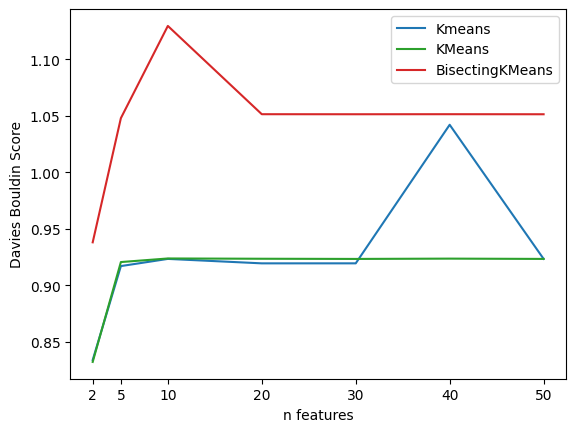

In [59]:
plt.figure()
plt.plot(size, res["Kmeans"], color='tab:blue', label="Kmeans")
plt.plot(size, res["KMeans"], color='tab:green', label="KMeans")
plt.plot(size, res["BisectingKMeans"], color='tab:red', label="BisectingKMeans")
plt.xlabel("n features")
plt.xticks(size)
plt.ylabel("Davies Bouldin Score")
plt.legend()
plt.show()

Чем ниже значение - тем лучше, поэтому размерность лучше уменьшать. Встроенный и реализованный алгоритм K-Means показывает практически одинаковый результат при n <= 30

## Теперь с помощью фреймворка *optuna* подберем гиперпараметры

In [75]:
import optuna
trials_num = 30

models = [Kmeans(), KMeans(), BisectingKMeans()]
models_name = ["Kmeans", "KMeans", "BisectingKMeans"]
params = [
    {"k": (2,7), "iters": (50,100)},
    {"n_clusters": (2,7), "init": ["k-means++", "random"], "n_init": (1, 10),"max_iter": (50,100), "algorithm":["lloyd", "elkan", "auto", "full"]}, 
    {"n_clusters": (2,7), "init": ["k-means++", "random"], "n_init": (1, 10),"max_iter": (50,100), "algorithm":["lloyd", "elkan"]}
]

In [76]:
results = {"Models": models_name, 
           "Davies Bouldin score": [],
           "Best Params":[]
          }

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

optuna.logging.set_verbosity(optuna.logging.WARNING)
for i in range(len(models)):
    def objective(trial):
        res_param = {}
        keys = list(params[i].keys())
        for key in keys:
            tmp = None
            if key == "algorithm" or "init":
                tmp = trial.suggest_categorical(key, params[i][key])
            else:
                tmp = trial.suggest_int(key, params[i][key][0], params[i][key][1])
            res_param[key] = tmp
        learner = type(models[i])(**res_param)
        pred = learner.fit_predict(X_reduced)
        return davies_bouldin_score(X_reduced, pred)
    optuna_study = optuna.create_study(direction="maximize")
    optuna_study.optimize(objective, n_trials=trials_num)
    results["Davies Bouldin score"].append(optuna_study.best_value)
    results["Best Params"].append(optuna_study.best_params)

In [77]:
print(results)

{'Models': ['Kmeans', 'KMeans', 'BisectingKMeans'], 'Davies Bouldin score': [0.9220262870518324, 0.9227810934491973, 0.9826973058941183], 'Best Params': [{'k': 2, 'iters': 50}, {'n_clusters': 2, 'init': 'random', 'n_init': 1, 'max_iter': 100, 'algorithm': 'lloyd'}, {'n_clusters': 7, 'init': 'random', 'n_init': 10, 'max_iter': 100, 'algorithm': 'lloyd'}]}


### Теперь посчитаем две популярные метрики *Silhouette score* и *Calinski–Harabasz* и замерим скорость на подоьранных параметрах

In [78]:
from time import process_time
from sklearn.metrics import silhouette_score, calinski_harabasz_score

results["Silhouette score"] = []
results["Calinski–Harabasz score"] = []
results["Time"] = []

for i in range(len(models)):
    learner = type(models[i])(**results["Best Params"][i])
    start_time = process_time()
    pred = learner.fit_predict(X_reduced)
    stop_time = process_time()
    results["Silhouette score"].append(davies_bouldin_score(X_reduced, pred))
    results["Calinski–Harabasz score"].append(calinski_harabasz_score(X_reduced, pred))
    results["Time"].append(stop_time-start_time)

In [79]:
results_ = results

### Выведем результаты обучения

In [80]:
pd.DataFrame(data = results_).sort_values(by="Davies Bouldin score").drop("Best Params", axis=1)

,Models,Davies Bouldin score,Silhouette score,Calinski–Harabasz score,Time
0,Kmeans,0.922026,0.921914,42811.054999,0.135271
1,KMeans,0.922781,0.922735,42809.727498,0.692576
2,BisectingKMeans,0.982697,0.982329,35600.702295,2.266756


Видим, что все три алгоритма показывают примерно одинаковые результаты. По времени обучения и по выбранным метрикам реализованная версия алгоритма **K-Means** показывает лучшие результаты.

# Визуализация данных снижением размерности до 2 с помощью *PCA* и *t-SNE*

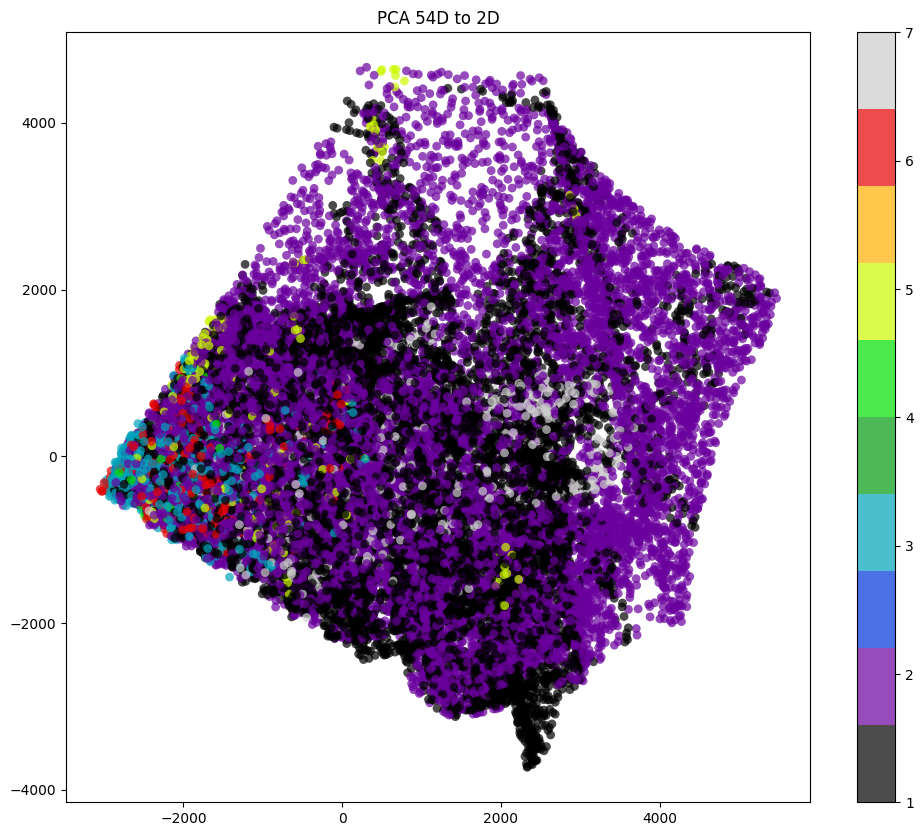

In [83]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title("PCA 54D to 2D");

Разделимость по кластерам оставляет желать лучшего. Посмотрим результаты t-SNE

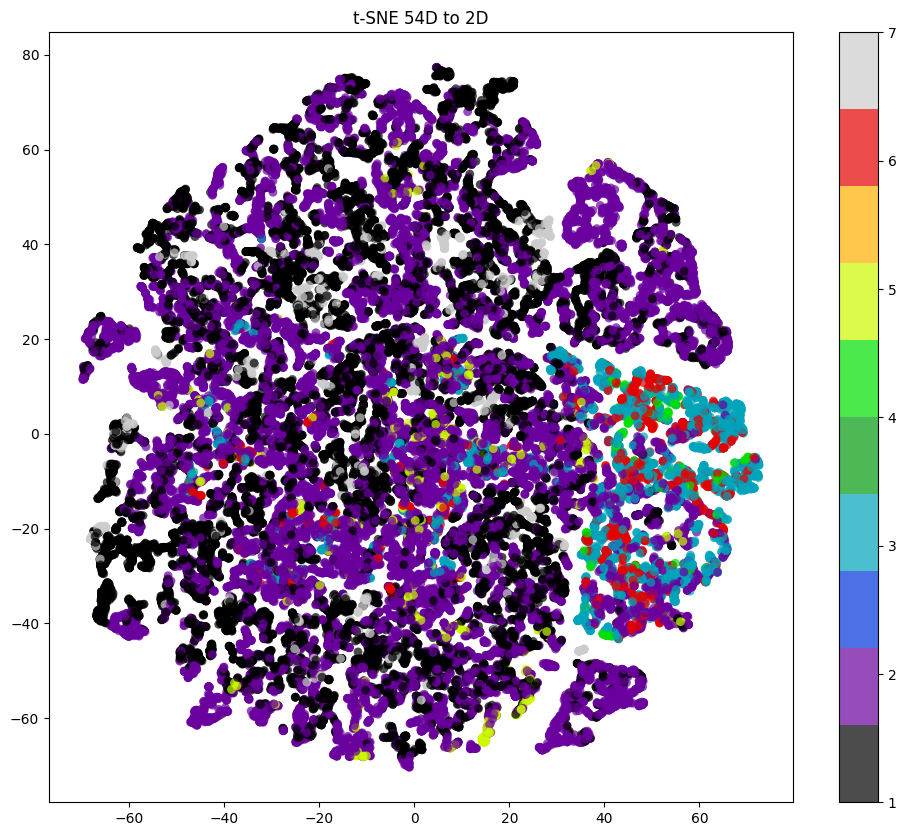

In [85]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12, 10))
plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y,
    edgecolor="none",
    alpha=0.7,
    s=40,
    cmap=plt.cm.get_cmap("nipy_spectral", 10),
)
plt.colorbar()
plt.title("t-SNE 54D to 2D");

t-SNE справляется с задачей немного лучше, хотя два самых популярных класса - 1 и 2 сильно перемешаны

### Визуализируем результаты обучения

In [87]:
Kmeans_PCA = Kmeans(k=7).fit_predict(X_reduced)
Kmeans_tSNE = Kmeans(k=7).fit_predict(X_tsne)

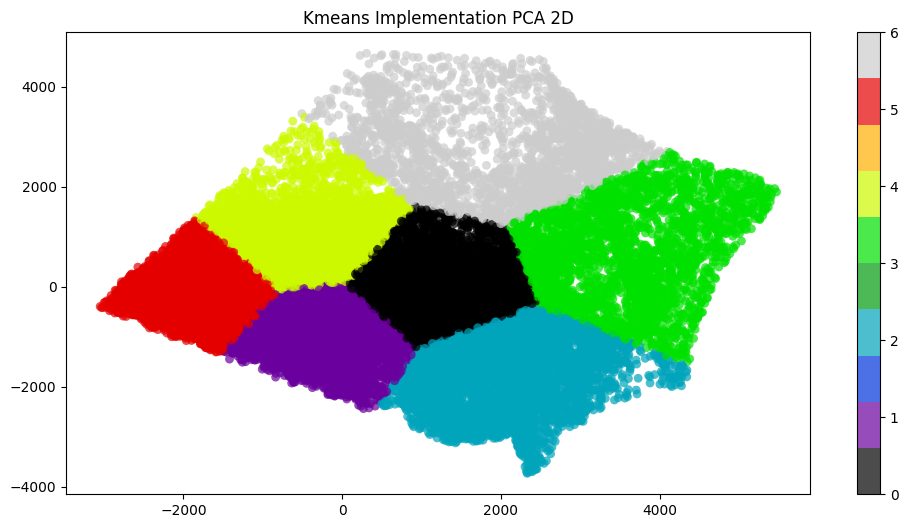

In [102]:
plt.figure(figsize=(12, 6))
plt.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c=Kmeans_PCA,
    edgecolor="none",
    alpha=0.7,
    s=40,
    cmap=plt.cm.get_cmap("nipy_spectral", 10),
)
plt.colorbar()
plt.title("Kmeans Implementation PCA 2D");

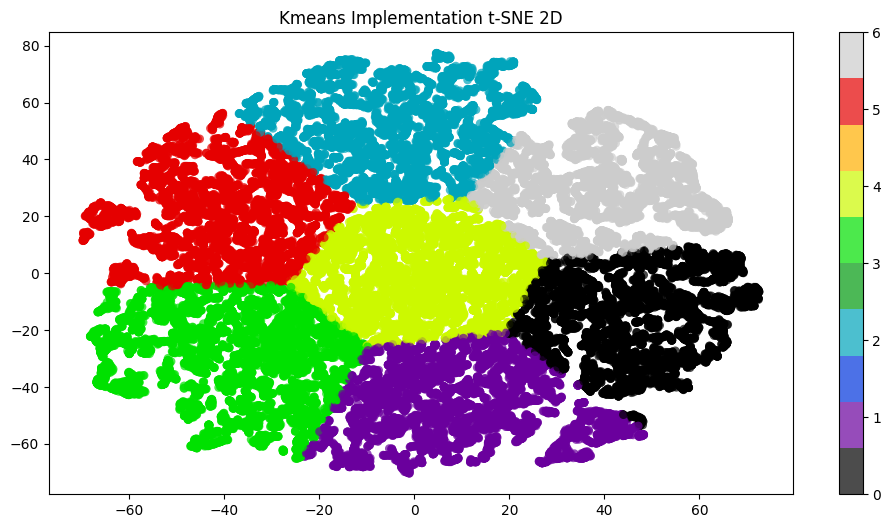

In [103]:
plt.figure(figsize=(12, 6))
plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=Kmeans_tSNE,
    edgecolor="none",
    alpha=0.7,
    s=40,
    cmap=plt.cm.get_cmap("nipy_spectral", 10),
)
plt.colorbar()
plt.title("Kmeans Implementation t-SNE 2D");

In [97]:
KMeans_PCA = KMeans(n_clusters=7).fit_predict(X_reduced)
KMeans_tSNE = KMeans(n_clusters=7).fit_predict(X_tsne)

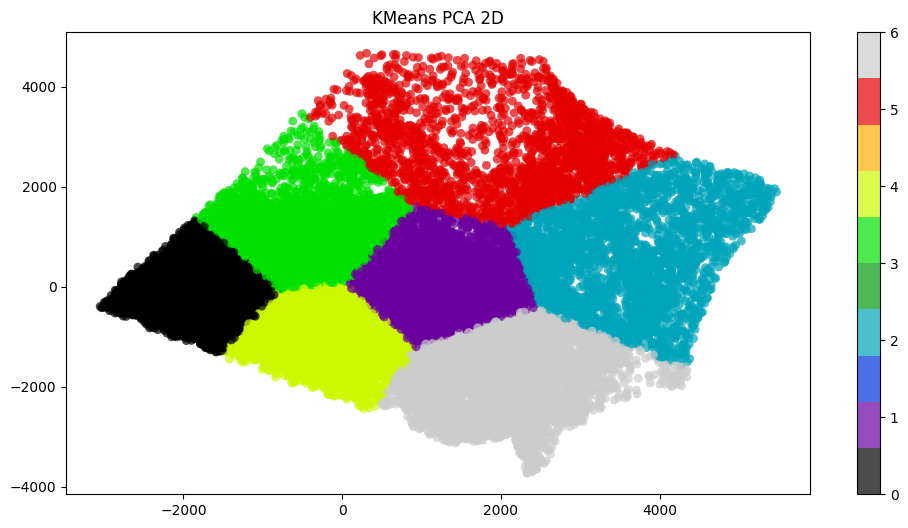

In [100]:
plt.figure(figsize=(12, 6))
plt.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c=KMeans_PCA,
    edgecolor="none",
    alpha=0.7,
    s=40,
    cmap=plt.cm.get_cmap("nipy_spectral", 10),
)
plt.colorbar()
plt.title("KMeans PCA 2D");

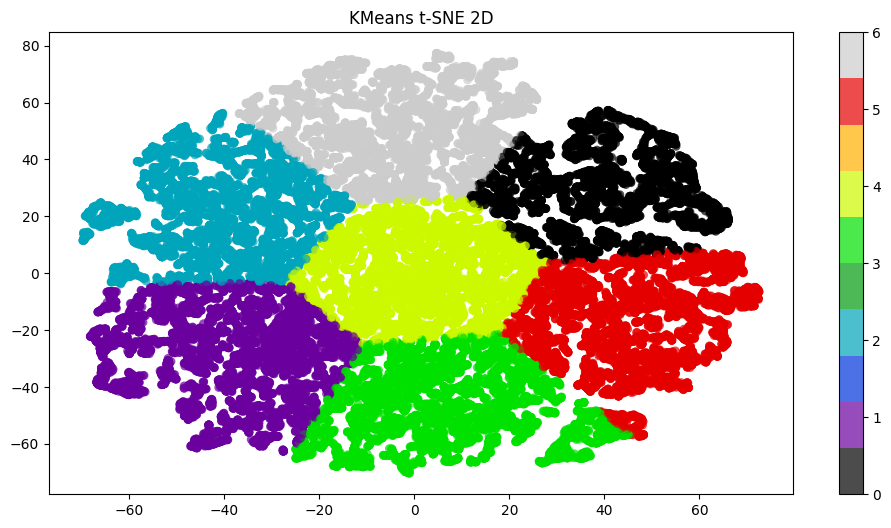

In [101]:
plt.figure(figsize=(12, 6))
plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=KMeans_tSNE,
    edgecolor="none",
    alpha=0.7,
    s=40,
    cmap=plt.cm.get_cmap("nipy_spectral", 10),
)
plt.colorbar()
plt.title("KMeans t-SNE 2D");

In [104]:
BKMeans_PCA = BisectingKMeans(n_clusters=7).fit_predict(X_reduced)
BKMeans_tSNE = BisectingKMeans(n_clusters=7).fit_predict(X_tsne)

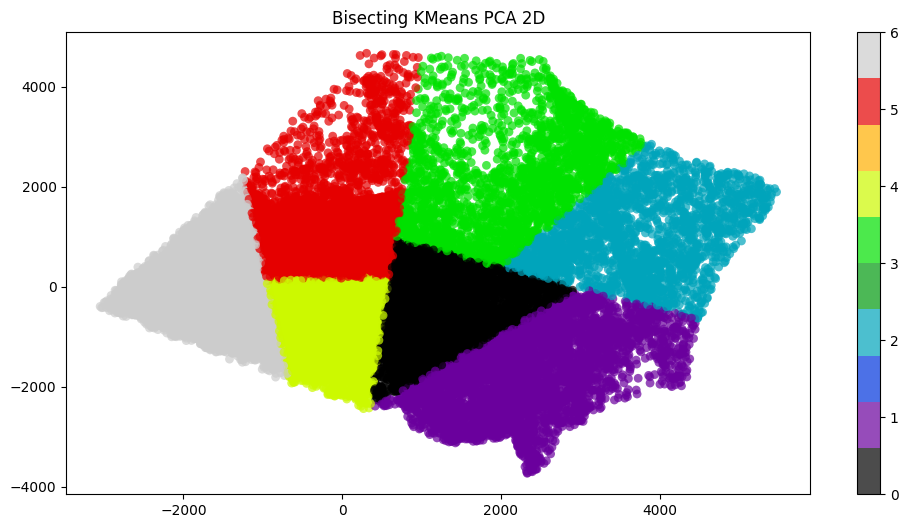

In [105]:
plt.figure(figsize=(12, 6))
plt.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c=BKMeans_PCA,
    edgecolor="none",
    alpha=0.7,
    s=40,
    cmap=plt.cm.get_cmap("nipy_spectral", 10),
)
plt.colorbar()
plt.title("Bisecting KMeans PCA 2D");

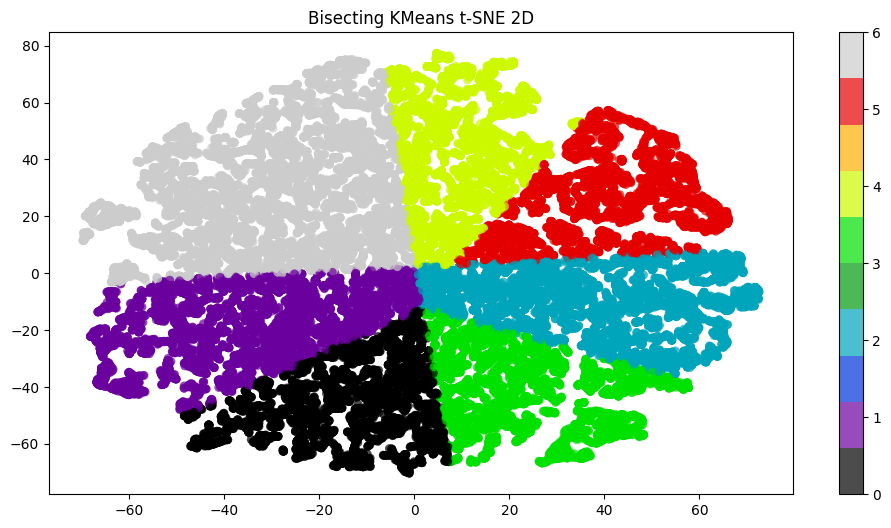

In [106]:
plt.figure(figsize=(12, 6))
plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=BKMeans_tSNE,
    edgecolor="none",
    alpha=0.7,
    s=40,
    cmap=plt.cm.get_cmap("nipy_spectral", 10),
)
plt.colorbar()
plt.title("Bisecting KMeans t-SNE 2D");

Смотря на графики можно сделать вывод, что все алгоритмы справляются с задачей кластеризации довольно неплохо при снижении размерности в 2D при помощи как PCA, так и t_SNE. Реализованная версия K-Means и библиотечная показывают практически одинаковые результаты. Bisecting K-Means немного отличается, но не хуже разделяет объекты по кластерам.